In [1]:
import os
from pathlib import Path
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from label_flip_revised.utils import create_dir

In [2]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)

/home/lukec/workspace/diva_01


In [3]:
path_output = os.path.join(PATH_ROOT, 'results_plot')
print(path_output)
create_dir(path_output)

/home/lukec/workspace/diva_01/results_plot


In [4]:
df_falfa_01 = pd.read_csv(os.path.join(PATH_ROOT, 'results', 'real', 'real_falfa_nn_db.csv'))
print(df_falfa_01.shape)
df_falfa_01.head()

(90, 38)


,Data,F1,F1 SD,F1v,F2,F3,F4,N1,N2,N2 SD,...,Hubs SD,Path.Train,Path.Poison,Path.Test,Rate,Train.Clean,Test.Clean,Train.Poison,Test.Poison,Data.Base
0,breastcancer_std_falfa_nn_0.00.csv,0.712464,0.215349,0.066235,6.264744e-11,0.485714,0.000000,0.074725,0.366983,0.074135,...,0.225796,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.00,0.986813,0.982456,0.986813,0.982456,breastcancer_std
1,breastcancer_std_falfa_nn_0.05.csv,0.859098,0.101038,0.133480,1.440449e-06,0.696703,0.000000,0.103297,0.382469,0.070786,...,0.283660,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.05,0.986813,0.982456,0.982418,0.956140,breastcancer_std
2,breastcancer_std_falfa_nn_0.10.csv,0.844907,0.108064,0.240749,2.910036e-09,0.753846,0.316484,0.191209,0.409176,0.076152,...,0.225717,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.10,0.986813,0.982456,0.964835,0.868421,breastcancer_std
3,breastcancer_std_falfa_nn_0.15.csv,0.948572,0.034941,0.258380,2.631059e-06,0.712088,0.048352,0.153846,0.396442,0.077667,...,0.181392,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.15,0.986813,0.982456,0.984615,0.824561,breastcancer_std
4,breastcancer_std_falfa_nn_0.20.csv,0.919837,0.052507,0.311281,6.912120e-10,0.723077,0.270330,0.217582,0.415749,0.075189,...,0.225626,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.20,0.986813,0.982456,0.971429,0.728070,breastcancer_std


In [5]:
df_falfa_01.columns

Index(['Data', 'F1', 'F1 SD', 'F1v', 'F2', 'F3', 'F4', 'N1', 'N2', 'N2 SD',
       'N3', 'N3 SD', 'N4', 'N4 SD', 'T1', 'T1 SD', 'LSC', 'L1', 'L2', 'L3',
       'T2', 'T3', 'T4', 'C1', 'C2', 'Density', 'ClsCoef', 'Hubs', 'Hubs SD',
       'Path.Train', 'Path.Poison', 'Path.Test', 'Rate', 'Train.Clean',
       'Test.Clean', 'Train.Poison', 'Test.Poison', 'Data.Base'],
      dtype='object')

In [6]:
datanames = np.sort(df_falfa_01['Data.Base'].unique())
print(datanames)

['abalone_subset_std' 'australian_std' 'banknote_std' 'breastcancer_std'
 'cmc_std' 'htru2_subset_std' 'phoneme_subset_std' 'ringnorm_subset_std'
 'texture_subset_std' 'yeast_subset_std']


In [7]:
cols_cm = [
    'F1', 'F1 SD', 'F1v', 'F2', 'F3', 'F4', 'N1', 'N2', 'N2 SD',
    'N3', 'N3 SD', 'N4', 'N4 SD', 'T1', 'T1 SD', 'LSC', 'L1', 'L2', 'L3',
    'T2', 'T3', 'T4', 'C1', 'C2', 'Density', 'ClsCoef', 'Hubs', 'Hubs SD',
]

workspace_names = [f'diva_{i:02d}' for i in range(1,6)]
print(workspace_names)

['diva_01', 'diva_02', 'diva_03', 'diva_04', 'diva_05']


In [8]:
N_FEATURES = 6
ATTACK = 'alfa_svm'

In [9]:
def get_mean_df(dataname, cols=cols_cm, n_features=N_FEATURES):
    dfs_ = []
    # Read from all workspaces
    for wname in workspace_names:
        df_ = pd.read_csv(os.path.join(PATH_ROOT.parent, wname, 'results', 'real', f'real_{ATTACK}_db.csv'))
        df_ = df_[df_['Data.Base'] == dataname]
        df_ = df_[cols + ['Rate', 'Train.Poison', 'Test.Poison']]
        df_ = df_.rename(columns={'Train.Poison': 'Train', 'Test.Poison': 'Test'})
        dfs_.append(df_)
    # Compute mean values for all measures
    df_res = pd.concat(dfs_).groupby('Rate').mean()

    # Get top N C-Measures, rate and accuracy
    df_cm_ = df_res[cols]
    idx = np.argsort(df_cm_.std())[-n_features:]
    cols_selected = np.sort(df_cm_.columns[idx].tolist())
    cols_selected = np.concatenate([cols_selected,  ['Train', 'Test']])
    df_res = df_res[cols_selected]
    print(cols_selected)
    
    # Convert to pivot table
    stack = df_res.stack()
    stack = stack.rename_axis(['Rate', 'Measure'])
    df_pivot = stack.to_frame()
    df_pivot.columns = ['Value']
    df_pivot = df_pivot.reset_index()

    # Use percentage
    df_pivot['Rate'] = df_pivot['Rate'] * 100

    return df_pivot


In [10]:
df_pivot = get_mean_df(datanames[0], cols=cols_cm, n_features=N_FEATURES)
print(datanames[0])
df_pivot

['C2' 'F1' 'F1v' 'F2' 'L2' 'L3' 'Train' 'Test']
abalone_subset_std


,Rate,Measure,Value
0,0.0,C2,0.000283
1,0.0,F1,0.714439
2,0.0,F1v,0.281305
3,0.0,F2,0.019423
4,0.0,L2,0.205875
...,...,...,...
67,40.0,F2,0.103190
68,40.0,L2,0.321000
69,40.0,L3,0.320500
70,40.0,Train,0.836375


abalone_subset_std
['C2' 'F1' 'F1v' 'F2' 'L2' 'L3' 'Train' 'Test']
Save to: /home/lukec/workspace/diva_01/results_plot/abalone_subset_std_line.pdf
australian_std
['C1' 'C2' 'F1 SD' 'F1v' 'Hubs' 'L1' 'Train' 'Test']
Save to: /home/lukec/workspace/diva_01/results_plot/australian_std_line.pdf
banknote_std
['C2' 'F1 SD' 'F1v' 'F3' 'F4' 'N4 SD' 'Train' 'Test']
Save to: /home/lukec/workspace/diva_01/results_plot/banknote_std_line.pdf
breastcancer_std
['C1' 'C2' 'F1' 'F3' 'F4' 'N4 SD' 'Train' 'Test']
Save to: /home/lukec/workspace/diva_01/results_plot/breastcancer_std_line.pdf
cmc_std
['C1' 'C2' 'F1v' 'Hubs' 'L2' 'L3' 'Train' 'Test']
Save to: /home/lukec/workspace/diva_01/results_plot/cmc_std_line.pdf
htru2_subset_std
['C1' 'C2' 'F1' 'F1v' 'F3' 'F4' 'Train' 'Test']
Save to: /home/lukec/workspace/diva_01/results_plot/htru2_subset_std_line.pdf
phoneme_subset_std
['F1v' 'F2' 'L2' 'L3' 'N1' 'N4' 'Train' 'Test']
Save to: /home/lukec/workspace/diva_01/results_plot/phoneme_subset_std_line.pdf
ringno

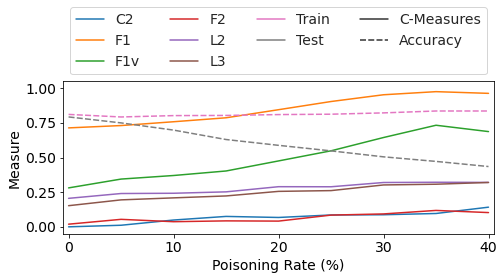

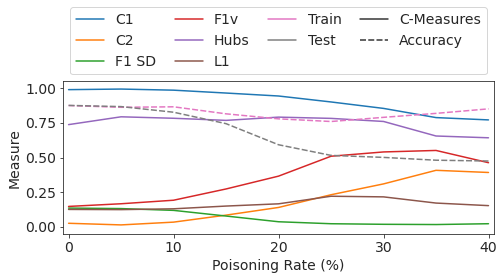

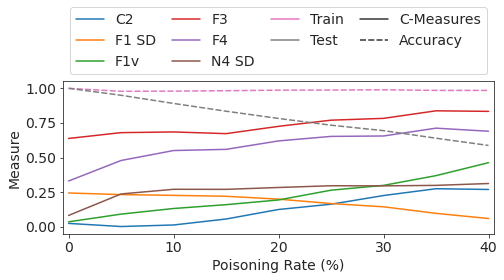

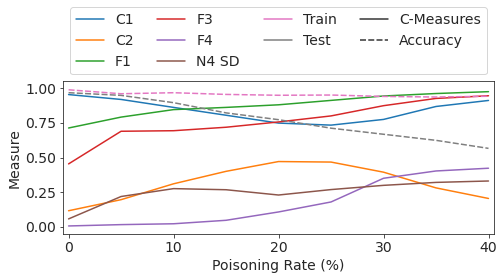

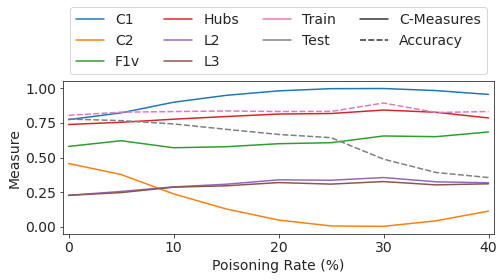

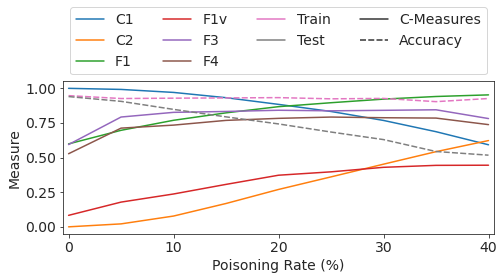

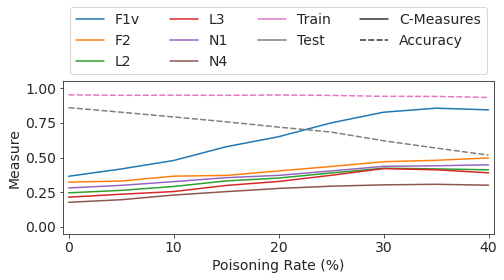

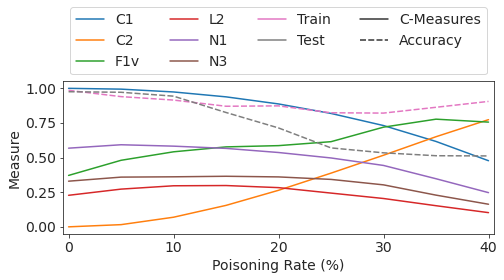

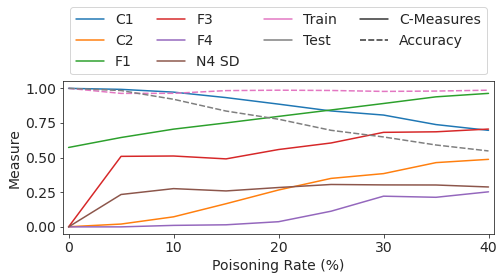

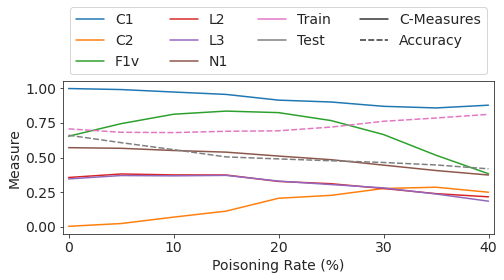

In [11]:
FONTSIZE = 14
FIGSIZE = (7, 4)

plt.rcParams["font.size"] = FONTSIZE

for dataname in datanames:
    print(dataname)
    df_pivot = get_mean_df(dataname, cols=cols_cm, n_features=N_FEATURES)
    df_pivot['Rate']
    fig, ax = plt.subplots(figsize=FIGSIZE)

    sns.set_style(style='ticks')
    line_style = ['Accuracy' if a in ['Train', 'Test'] else 'C-Measures' for a in df_pivot['Measure']]
    g = sns.lineplot(data=df_pivot, x='Rate', y='Value', hue='Measure', ax=ax, style=line_style, legend='brief')
    plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=4)
    ax.set_xlabel('Poisoning Rate (%)')
    ax.set(xlim=[-0.5, 40.5], ylim=[-0.05, 1.05])
    plt.ylabel('Measure')
    plt.tight_layout(pad=0.8)
    plt.xticks(np.arange(0, 41, 10))
    
    path_fig_out = os.path.join(path_output, f'{dataname}_line.pdf', )
    print(f'Save to: {path_fig_out}')
    plt.savefig(path_fig_out, dpi=300, bbox_inches='tight')